In [1]:
!pip install librosa

In [2]:
!pip install python_speech_features

In [3]:
#!pip install tensorflow

In [4]:
import numpy as np 
import pandas as pd

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [65]:
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from python_speech_features import mfcc
import scipy.io.wavfile as wav
from tempfile import TemporaryFile
import random 
import operator
import math

In [6]:
df = pd.read_csv("C:/Users/Admin/Desktop/ML Project/Datasets/features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [62]:
df.tail()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
9985             1499.083005          164266.886443              1718.707215   
9986             1847.965128          281054.935973              1906.468492   
9987             1346.157659          662956.246325              1561.859087   
9988             2084.515327          203891.039161              2018.366254   
9989             1634.330126          411429.169769              1867.422378   

      spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
9985            85931.574523   3015.559458  ...   42.485981    -9.094270   
9986            99727.037054   3746.694524  ...   32.415203   -12.375726   
9987           138762.841945   2442.362154  ...   78.228149    -2.524483   
9988            22860.992562   4313.266226  ...   28.323744    -5.363541   
9989           119722.211518   3462.042142  ...   38.801735   -11.598399   

      mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
9985   38.326839    -4.246976   31.049839    -5.625813   48.804092   
9986   66.418587    -3.081278   54.414265   -11.960546   63.452255   
9987   21.778994     4.809936   25.980829     1.775686   48.582378   
9988   17.209942     6.462601   21.442928     2.354765   24.843613   
9989   58.983097    -0.178517   55.761299    -6.903252   39.485901   

      mfcc20_mean  mfcc20_var  label  
9985     1.818823   38.966969   rock  
9986     0.428857   18.697033   rock  
9987    -0.299545   41.586990   rock  
9988     0.675824   12.787750   rock  
9989    -3.412534   31.727489   rock  

[5 rows x 59 columns]

In [63]:
location = 'C:/Users/Admin/Desktop/ML Project/Datasets/Train_Data'
print(list(os.listdir(f'{location}')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [7]:
df.shape

(9990, 60)

In [8]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [57]:
# print data information report
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   9990 non-null   int64  
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  harmony_var             

In [58]:
# Check for missing values
df.isnull()

length  chroma_stft_mean  chroma_stft_var  rms_mean  rms_var  \
0      False             False            False     False    False   
1      False             False            False     False    False   
2      False             False            False     False    False   
3      False             False            False     False    False   
4      False             False            False     False    False   
...      ...               ...              ...       ...      ...   
9985   False             False            False     False    False   
9986   False             False            False     False    False   
9987   False             False            False     False    False   
9988   False             False            False     False    False   
9989   False             False            False     False    False   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                      False                  False                    False   
1                      False                  False                    False   
2                      False                  False                    False   
3                      False                  False                    False   
4                      False                  False                    False   
...                      ...                    ...                      ...   
9985                   False                  False                    False   
9986                   False                  False                    False   
9987                   False                  False                    False   
9988                   False                  False                    False   
9989                   False                  False                    False   

      spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0                      False         False  ...       False        False   
1                      False         False  ...       False        False   
2                      False         False  ...       False        False   
3                      False         False  ...       False        False   
4                      False         False  ...       False        False   
...                      ...           ...  ...         ...          ...   
9985                   False         False  ...       False        False   
9986                   False         False  ...       False        False   
9987                   False         False  ...       False        False   
9988                   False         False  ...       False        False   
9989                   False         False  ...       False        False   

      mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0          False        False       False        False       False   
1          False        False       False        False       False   
2          False        False       False        False       False   
3          False        False       False        False       False   
4          False        False       False        False       False   
...          ...          ...         ...          ...         ...   
9985       False        False       False        False       False   
9986       False        False       False        False       False   
9987       False        False       False        False       False   
9988       False        False       False        False       False   
9989       False        False       False        False       False   

      mfcc20_mean  mfcc20_var  label  
0           False       False  False  
1           False       False  False  
2           False       False  False  
3           False       False  False  
4           False       False  False  
...           ...         ...    ...  
9985        False       False  False  
9986        False       False  False  
9987        False       False  False  
9988        False       False  False  
9989        False    

In [59]:
# print statistical summary of data
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

In [70]:
# print correlation matrix
cor=df.corr()

In [60]:
df.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

In [61]:
df.isnull().count()

length                     9990
chroma_stft_mean           9990
chroma_stft_var            9990
rms_mean                   9990
rms_var                    9990
spectral_centroid_mean     9990
spectral_centroid_var      9990
spectral_bandwidth_mean    9990
spectral_bandwidth_var     9990
rolloff_mean               9990
rolloff_var                9990
zero_crossing_rate_mean    9990
zero_crossing_rate_var     9990
harmony_mean               9990
harmony_var                9990
perceptr_mean              9990
perceptr_var               9990
tempo                      9990
mfcc1_mean                 9990
mfcc1_var                  9990
mfcc2_mean                 9990
mfcc2_var                  9990
mfcc3_mean                 9990
mfcc3_var                  9990
mfcc4_mean                 9990
mfcc4_var                  9990
mfcc5_mean                 9990
mfcc5_var                  9990
mfcc6_mean                 9990
mfcc6_var                  9990
mfcc7_mean                 9990
mfcc7_va

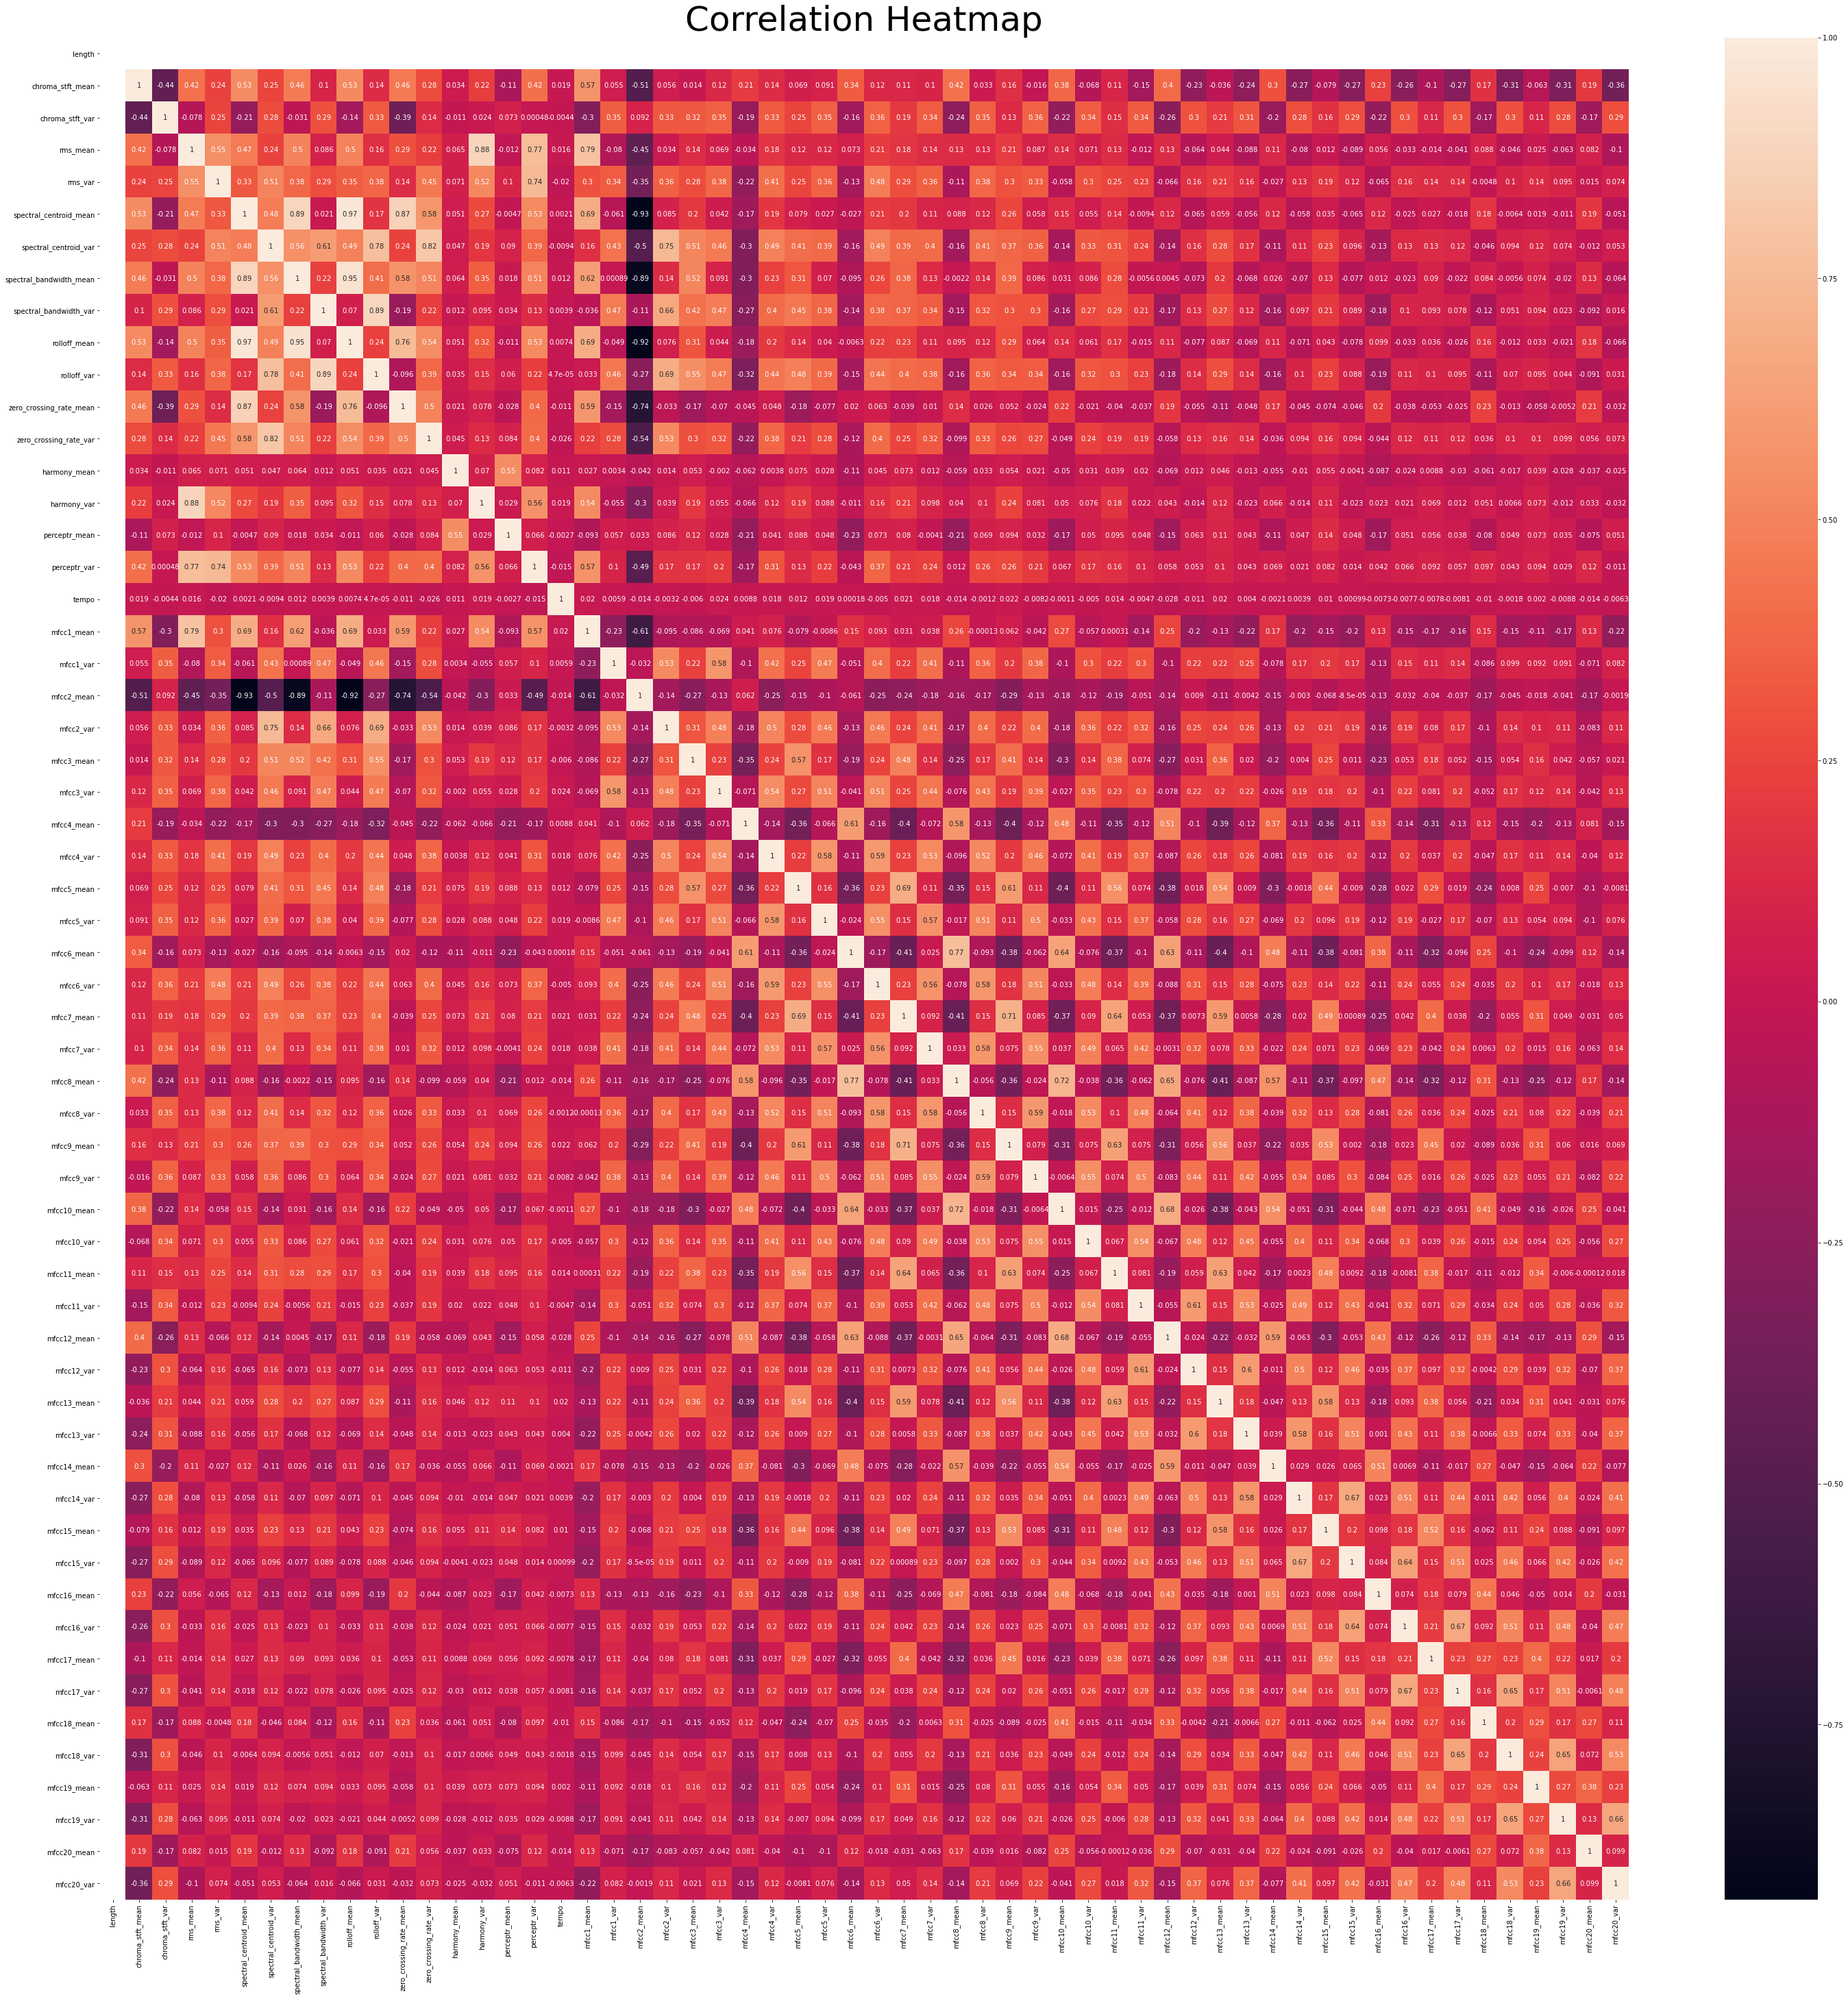

In [81]:
#print heatmap matrix
fig=plt.figure(figsize=(50,50))

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(cor, dtype=np.bool))

sns.heatmap(cor,  annot=True)
plt.title('Correlation Heatmap', fontsize = 50)
plt.savefig("Corr Heatmap.jpg")

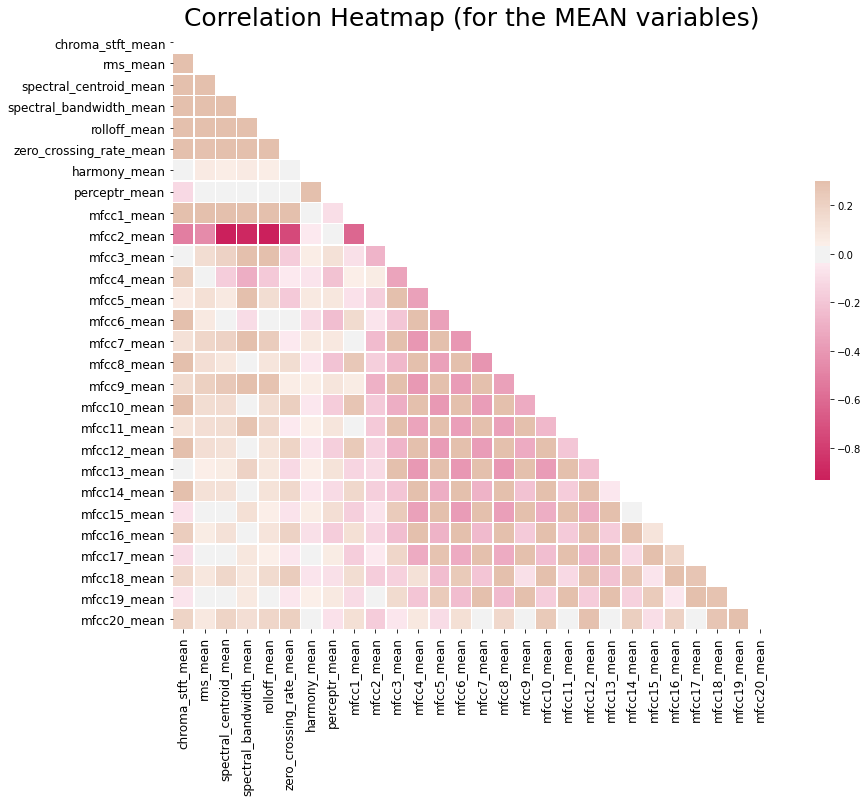

In [73]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);
#plt.savefig("Corr Heatmap.jpg")

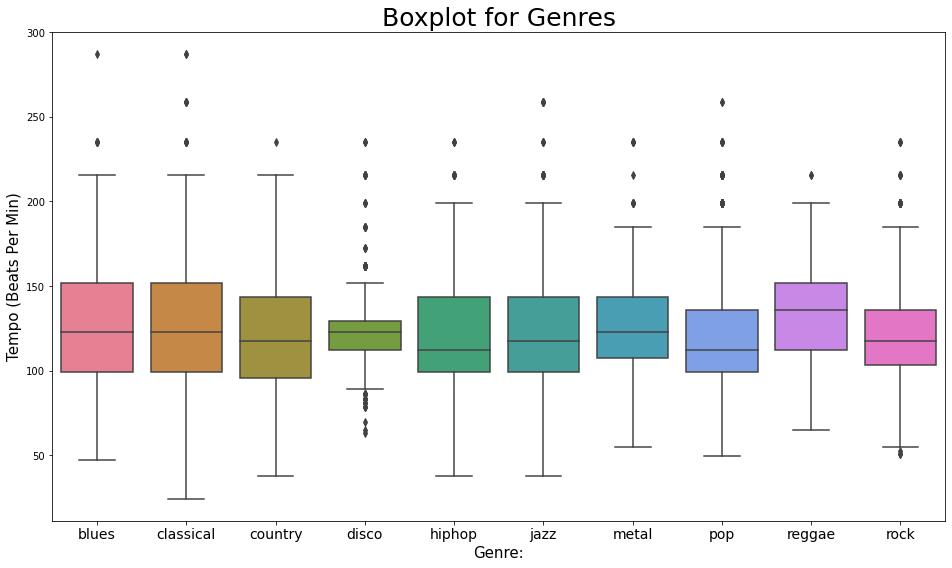

In [83]:
x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre:", fontsize = 15)
plt.ylabel("Tempo (Beats Per Min)", fontsize = 15)
plt.savefig("Boxplot.jpg")

In [94]:
#Understanding Audio
# Importing 1 file
y, sr = librosa.load(f'{location}/classical/classical.00024.wav')

print('y: ', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y:  [-0.03775024 -0.07223511 -0.08242798 ...  0.02264404  0.00308228
 -0.0105896 ] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [95]:
df=df.drop(labels="filename",axis=1)

KeyError: "['filename'] not found in axis"

In [97]:
audio_recording="C:/Users/Admin/Desktop/ML Project/Datasets/Train_Data/classical/classical.00024.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [98]:
librosa.load(audio_recording,sr=45600)

(array([-0.03754719, -0.0586651 , -0.07184538, ..., -0.00783078,
        -0.01018334, -0.00593292], dtype=float32),
 45600)

# Playing Audio

In [99]:
import IPython
IPython.display.Audio(data,rate=sr)

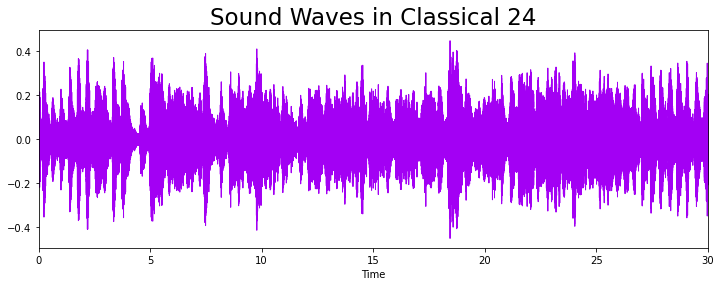

In [102]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,color="#A300F4")
plt.title("Sound Waves in Classical 24", fontsize = 23);
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


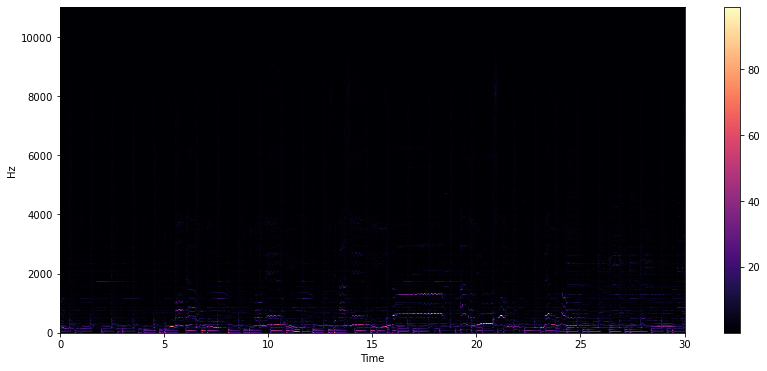

In [14]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

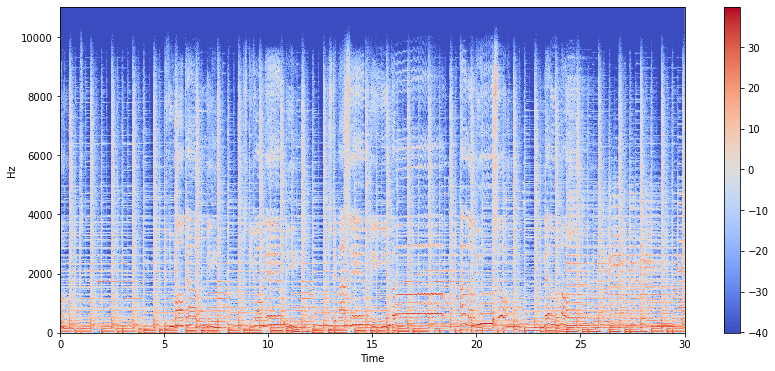

In [15]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

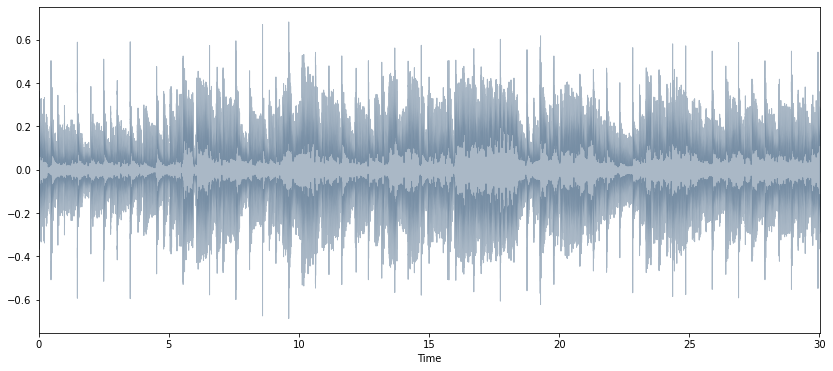

In [16]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveplot(data,sr=sr,alpha=0.4,color="#2B4F72")

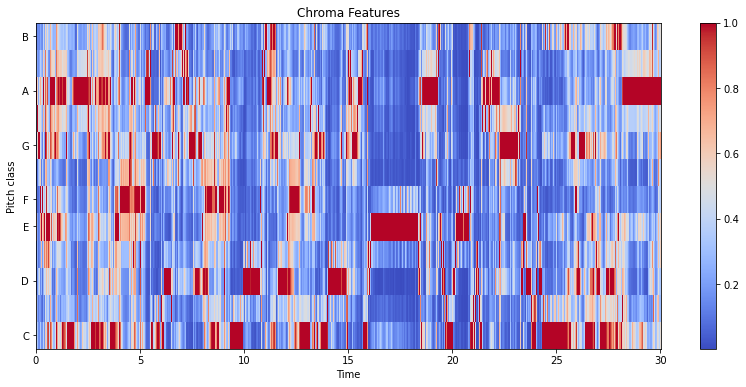

In [17]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

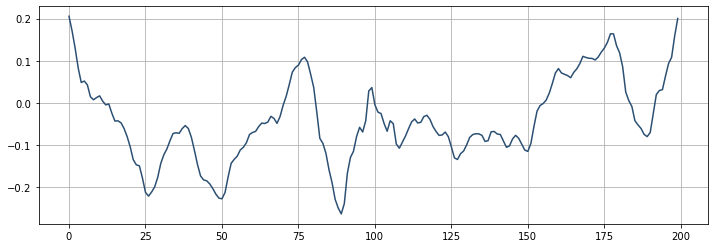

In [18]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [19]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the numbert of zero_crossings is :", sum(zero_cross_rate))

the numbert of zero_crossings is : 8


# Feature Extraction

In [20]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [21]:
y=converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [22]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

Spliting Dataset

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
len(y_test)

1998

In [26]:
len(y_train)

7992

# Buidling the model

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [29]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [30]:
import tensorflow as tf

In [31]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

Model Evaluation

In [32]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("Test loss :  ",test_loss)
print("Best Accuracy : ",test_acc*100)

16/16 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.9439
Test loss :   0.33832061290740967
Best Accuracy :  94.39439177513123


Classification

In [40]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [41]:
def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1 
        else:
            classVote[response]=1

    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [42]:
def getAccuracy(testSet, predictions):
    correct = 0 
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

In [43]:
def distance(instance1 , instance2 , k ):
    distance =0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance-= k
    return distance

In [45]:
directory = r"C:/Users/Admin/Desktop/ML Project/Datasets/Train_Data/"
f= open("my.dat" ,'wb')
i=0
for folder in os.listdir(directory):
    i+=1
    print(folder)
    if i==11 :
        print(folder)
        break   
    fdir= directory+folder
    if os.path.isdir(fdir):
        for file in os.listdir(fdir):  
            (rate,sig) = wav.read(fdir+"/"+file)
            mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix , covariance , i)
            pickle.dump(feature , f)
            print(file)
f.close()

blues
blues.00000.wav
blues.00001.wav
blues.00002.wav
blues.00003.wav
blues.00004.wav
blues.00005.wav
blues.00006.wav
blues.00007.wav
blues.00008.wav
blues.00009.wav
blues.00010.wav
blues.00011.wav
blues.00012.wav
blues.00013.wav
blues.00014.wav
blues.00015.wav
blues.00016.wav
blues.00017.wav
blues.00018.wav
blues.00019.wav
blues.00020.wav
blues.00021.wav
blues.00022.wav
blues.00023.wav
blues.00024.wav
blues.00025.wav
blues.00026.wav
blues.00027.wav
blues.00028.wav
blues.00029.wav
blues.00030.wav
blues.00031.wav
blues.00032.wav
blues.00033.wav
blues.00034.wav
blues.00035.wav
blues.00036.wav
blues.00037.wav
blues.00038.wav
blues.00039.wav
blues.00040.wav
blues.00041.wav
blues.00042.wav
blues.00043.wav
blues.00044.wav
blues.00045.wav
blues.00046.wav
blues.00047.wav
blues.00048.wav
blues.00049.wav
blues.00050.wav
blues.00051.wav
blues.00052.wav
blues.00053.wav
blues.00054.wav
blues.00055.wav
blues.00056.wav
blues.00057.wav
blues.00058.wav
blues.00059.wav
blues.00060.wav
blues.00061.wav
bl

In [46]:
dataset = []
def loadDataset(filename , split , trSet , teSet):
    with open("my.dat" , 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  

    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])  

trainingSet = []
testSet = []
loadDataset("my.dat" , 0.66, trainingSet, testSet)

In [47]:
leng = len(testSet)
predictions = []
for x in range (leng):
    predictions.append(nearestClass(getNeighbors(trainingSet ,testSet[x] , 5))) 

accuracy1 = getAccuracy(testSet , predictions)
print(accuracy1)

0.6694915254237288


In [48]:
from collections import defaultdict
results=defaultdict(int)

In [49]:
i=1
for folder in os.listdir("C:/Users/Admin/Desktop/ML Project/Datasets/Train_Data"):
    results[i]=folder
    i+=1
print(results)

defaultdict(<class 'int'>, {1: 'blues', 2: 'classical', 3: 'country', 4: 'disco', 5: 'hiphop', 6: 'jazz', 7: 'metal', 8: 'pop', 9: 'reggae', 10: 'rock'})


In [50]:
(rate,sig)=wav.read("C:/Users/Admin/Desktop/ML Project/Datasets/Test_Data/music_wav/hendrix.wav")
mfcc_feat=mfcc(sig,rate,winlen=0.020,appendEnergy=False)
covariance = np.cov(np.matrix.transpose(mfcc_feat))
mean_matrix = mfcc_feat.mean(0)
feature=(mean_matrix,covariance,0)

In [51]:
pred=nearestClass(getNeighbors(dataset ,feature , 5))

In [52]:
print(results[pred])

rock
